# ABC Analysis

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import the dataset of store products
# Read the file
data = pd.read_csv("abc.csv")

In [4]:
data.head(5)

,StockCode,Description,quantity,revenue
0,10080,check,22,0.00
1,10080,GROOVY CACTUS INFLATABLE,121,47.19
2,10120,DOGGY RUBBER,72,15.12
3,10124A,SPOTS ON RED BOOKCOVER TAPE,4,1.68
4,10124G,ARMY CAMO BOOKCOVER TAPE,8,3.36


In [5]:
#function for ABC Segmentation
def ABC_segmentation(perc):
   # Creates the 3 classes A, B, and C based on cost percentages (A-60%, B-25%, C-15%)
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [6]:
# order by the field of interest in decending order
data= data.sort_values(by=['revenue'], ascending=False)
data.head()

,StockCode,Description,quantity,revenue
3436,DOT,DOTCOM POSTAGE,138,85834.48
1784,23084,RABBIT NIGHT LIGHT,25694,56894.39
862,22086,PAPER CHAIN KIT 50'S CHRISTMAS,15179,50907.49
1152,22423,REGENCY CAKESTAND 3 TIER,3161,40183.50
3036,85099B,JUMBO BAG RED RETROSPOT,15812,31101.76


In [7]:
# create the column of the running Cumulative Revenue per SKU, use  the cumsum() function
data['RunCumRev'] = data['revenue'].cumsum()
data.head()

,StockCode,Description,quantity,revenue,RunCumRev
3436,DOT,DOTCOM POSTAGE,138,85834.48,85834.48
1784,23084,RABBIT NIGHT LIGHT,25694,56894.39,142728.87
862,22086,PAPER CHAIN KIT 50'S CHRISTMAS,15179,50907.49,193636.36
1152,22423,REGENCY CAKESTAND 3 TIER,3161,40183.50,233819.86
3036,85099B,JUMBO BAG RED RETROSPOT,15812,31101.76,264921.62


In [8]:
# Calculate total sum of additive cost
Total_Sum = data['revenue'].sum()
print(Total_Sum)

3939403.122


In [10]:
# create the column of the running percentage
data['RunPerc'] =  data['RunCumRev']/Total_Sum
data.head()

,StockCode,Description,quantity,revenue,RunCumRev,RunPerc
3436,DOT,DOTCOM POSTAGE,138,85834.48,85834.48,0.021789
1784,23084,RABBIT NIGHT LIGHT,25694,56894.39,142728.87,0.036231
862,22086,PAPER CHAIN KIT 50'S CHRISTMAS,15179,50907.49,193636.36,0.049154
1152,22423,REGENCY CAKESTAND 3 TIER,3161,40183.50,233819.86,0.059354
3036,85099B,JUMBO BAG RED RETROSPOT,15812,31101.76,264921.62,0.067249


In [11]:
# create the column of the class by using the user defined function
data['Class'] = data['RunPerc'].apply(ABC_segmentation)
data.head()

,StockCode,Description,quantity,revenue,RunCumRev,RunPerc,Class
3436,DOT,DOTCOM POSTAGE,138,85834.48,85834.48,0.021789,A
1784,23084,RABBIT NIGHT LIGHT,25694,56894.39,142728.87,0.036231,A
862,22086,PAPER CHAIN KIT 50'S CHRISTMAS,15179,50907.49,193636.36,0.049154,A
1152,22423,REGENCY CAKESTAND 3 TIER,3161,40183.50,233819.86,0.059354,A
3036,85099B,JUMBO BAG RED RETROSPOT,15812,31101.76,264921.62,0.067249,A


In [12]:
# Show the numbers in each class
data.Class.value_counts()

C    2584
B     547
A     312
Name: Class, dtype: int64

In [13]:
# Calculate and print total revenue per class

print ('Revenue of Class A :', round(data[data.Class == 'A']['revenue'].sum(), 2))
print ('Revenue of Class B :', round(data[data.Class == 'B']['revenue'].sum(), 2))
print ('Revenue of Class C :', round(data[data.Class == 'C']['revenue'].sum(), 2))


Revenue of Class A : 2361319.51
Revenue of Class B : 986301.87
Revenue of Class C : 591781.74


In [14]:
# Calculate and print the percent of revenue per class
print ('Percent of Revenue of Class A :', round(data[data.Class == 'A']['revenue'].sum()/data['revenue'].sum()*100,2))
print ('Percent of Revenue of Class B :', round(data[data.Class == 'B']['revenue'].sum()/data['revenue'].sum()*100, 2))
print ('Percent of Revenue of Class C :', round(data[data.Class == 'C']['revenue'].sum()/data['revenue'].sum()*100, 2))

Percent of Revenue of Class A : 59.94
Percent of Revenue of Class B : 25.04
Percent of Revenue of Class C : 15.02


In [15]:
# Calculate and print the percent of quantity per class
print ('Percent of Quantity Class A :', round(data[data.Class == 'A']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Quantity Class B :', round(data[data.Class == 'B']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Quantity Class C :', round(data[data.Class == 'C']['Class'].count()/data['Class'].count()*100, 2))


Percent of Quantity Class A : 9.06
Percent of Quantity Class B : 15.89
Percent of Quantity Class C : 75.05


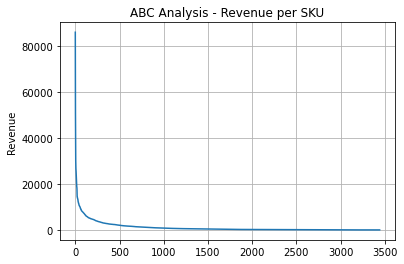

In [18]:
# Convert the Cost column to a list
visual = data['revenue'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('Revenue')
plt.title('ABC Analysis - Revenue per SKU')
plt.grid(True)
#plt.ylim((0,100000))
plt.show()

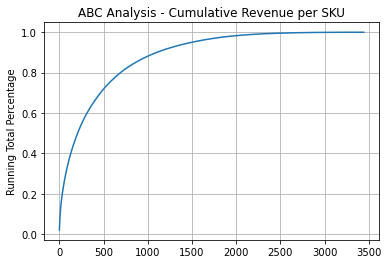

In [17]:
# Convert the running percentage column to a list
visual = data['RunPerc'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Revenue per SKU')
plt.grid(True)
plt.show()

# Plot that list, Provide proper headings to the plot